In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
full_data = pd.read_csv('./data/nasdaq100_padding.csv')

In [3]:
full_data.head()

,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,AMGN,...,TXN,VIAB,VOD,VRTX,WBA,WDC,WFM,XLNX,YHOO,NDX
0,35.9800,96.80,97.80,61.15,95.4000,58.180000,58.00,127.040,26.680,165.8100,...,70.73,45.230,31.1701,95.270,81.365,52.16,33.95,48.61,38.010,4665.054
1,35.9310,96.89,97.80,61.61,95.4115,58.190000,58.12,126.060,26.730,165.9101,...,70.69,45.010,31.1900,94.170,81.540,52.15,34.10,48.74,38.140,4665.054
2,35.9044,96.95,97.57,61.98,95.5100,58.203333,57.95,126.510,26.712,166.1800,...,71.30,45.015,31.2100,94.749,81.530,52.27,34.01,48.99,38.150,4665.826
3,35.8900,96.97,97.55,62.09,95.5200,58.216667,57.96,126.280,26.740,166.1480,...,71.31,45.020,31.2100,94.310,81.710,52.30,33.96,48.95,38.195,4667.081
4,36.0080,96.96,97.73,61.89,95.5300,58.230000,58.21,126.585,26.720,165.9900,...,71.06,45.050,31.1800,94.155,81.720,52.30,34.17,48.89,38.320,4664.491


In [4]:
full_data.columns

Index(['AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'ALXN', 'AMAT',
       'AMGN', 'AMZN', 'ATVI', 'AVGO', 'BBBY', 'BIDU', 'BIIB', 'CA', 'CELG',
       'CERN', 'CMCSA', 'COST', 'CSCO', 'CSX', 'CTRP', 'CTSH', 'DISCA', 'DISH',
       'DLTR', 'EA', 'EBAY', 'ESRX', 'EXPE', 'FAST', 'FB', 'FOX', 'FOXA',
       'GILD', 'GOOGL', 'INTC', 'JD', 'KHC', 'LBTYA', 'LBTYK', 'LRCX', 'MAR',
       'MAT', 'MCHP', 'MDLZ', 'MSFT', 'MU', 'MXIM', 'MYL', 'NCLH', 'NFLX',
       'NTAP', 'NVDA', 'NXPI', 'PAYX', 'PCAR', 'PYPL', 'QCOM', 'QVCA', 'ROST',
       'SBUX', 'SIRI', 'STX', 'SWKS', 'SYMC', 'TMUS', 'TRIP', 'TSCO', 'TSLA',
       'TXN', 'VIAB', 'VOD', 'VRTX', 'WBA', 'WDC', 'WFM', 'XLNX', 'YHOO',
       'NDX'],
      dtype='object')

In [90]:
full_data.dtypes

AAL     float64
AAPL    float64
ADBE    float64
ADI     float64
ADP     float64
         ...   
WDC     float64
WFM     float64
XLNX    float64
YHOO    float64
NDX     float64
Length: 82, dtype: object

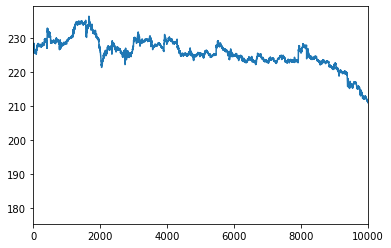

In [5]:
plt.xlim(0,10000)
full_data['TSLA'].plot()

In [6]:
# prepare the log-differenced data
log_diff_data = pd.DataFrame(columns=full_data.columns)

In [7]:
for c in log_diff_data:
    log_diff_data[c] = np.log(1+full_data[c].pct_change())

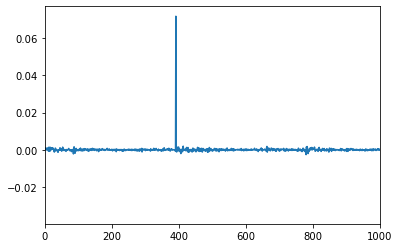

In [8]:
plt.xlim(0,1000)
log_diff_data['AAPL'].plot()

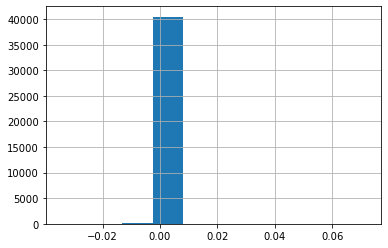

In [9]:
log_diff_data['AAPL'].hist()

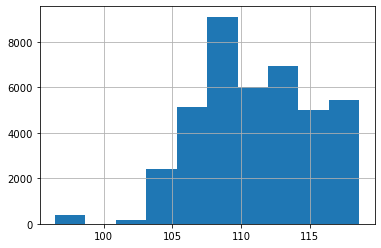

In [10]:
full_data['AAPL'].hist()

In [28]:
(log_diff_data['AAPL'].diff().rolling(60))

Rolling [window=60,center=False,axis=0]

In [96]:
x = log_diff_data['AAPL'].dropna()
x.rolling(15).std()

DataError: No numeric types to aggregate

In [11]:
import gym

In [163]:
INITIAL_BALANCE = 10
TRANSACTION_COST = 0.01
WINDOW_SIZE = 60
DELTA_DAY = pd.Timedelta(days=1)
DEFAUT
from pandas_datareader import data
class TradingEnv(gym.Env):
    
    def __init__(self, ticker='AAPL', target_volatility=1, mode="train"):
        self.ticker = ticker
        self.window = pd.Timedelta(days=WINDOW_SIZE)
        self.mode = mode
        assert mode in set(["train", "validation", "test", "dev"])
        start, end = self.get_time_endpoints(mode)
        self.data = data.DataReader(ticker, 'yahoo', start=start-self.window, end=end+self.window)['Close']

        self.df_index = WINDOW_SIZE # to look up next price from self.data
        self.end = end
        self.target_volatility = target_volatility
        
        self.rewards_list = []
        self.actions_list = []
        
    def get_time_endpoints(self, mode):
        if mode == "train":
            return pd.Timestamp('2016-01-04'), pd.Timestamp('2016-12-31')
        elif mode == "dev":
            return pd.Timestamp('2016-01-04'), pd.Timestamp('2016-02-28')
        
    def _get_current_price(self):
        return self.data[self.df_index]
        
    def _get_current_timestamp(self):
        return self.data.index[self.df_index]
    
    def reset(self):
        self.df_index = WINDOW_SIZE
        self.returns_list = []
        self.rewards_list = []
        self.actions_list = []
        return self._get_current_price()
    
    def seed(self, seed=None):
        return
    
    def close(self):
        return
    
    def step(self, action):
        """
            Executes an action in the stock environment, using 
            the discrete action space described in: Deep Reinforcement Learning for Trading
            
            i.e. -1 is maximally short, 0 is no holdings, 1 is maximally long
            Inputs: action (one of {-1,0,1})
            Outputs: a tuple (observation/state, step_reward, is_done, info)
        """
        
        next_price = self.data[self.df_index + 1]
        price = self._get_current_price()
        r = next_price - price
        mu = 1
        
#         sigma = self.data['std'][self.df_index - 1] 
#         sigma_prev = self.data['std'][self.df_index - 2]
        sigma = 1 
        sigma_prev = 1
        
        term1 = action * self.target_volatility * r / sigma
        prev_action = self.actions_list[-1]
        term2 = price * TRANSACTION_COST * np.abs(term1 - self.target_volatility * prev_action / sigma_prev)
        R = term1 - term2
        
        self.rewards_list.append(R)
        self.actions_list.append(action)
        self.df_index += 1
        return next_price, R, self.df_index > self.end, {}

env = TradingEnv()
# print(env.reset())
# print(env.step(1))

In [164]:
env.reset()

96.3499984741211

In [165]:
env.step(0)

IndexError: list index out of range

In [140]:
env.data[env.data.index[0]]

121.18000030517578

In [142]:
env.data.index[0] == pd.Timestamp('2015-11-02')

True